In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scikitplot as skplt
from sklearn.model_selection import cross_val_score, KFold

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import macrophages_analysis

## Data import

In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_p4g4_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_p4g4 = nucleus_dataset_p4g4_206.merge(nucleus_dataset_p4g4_86, how='outer')

nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
nucleus_dataset_tcps_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
nucleus_dataset_tcps = nucleus_dataset_tcps_206.merge(nucleus_dataset_tcps_86, how='outer')

## 20x_CD206+CD86_TCPS_model_P4G4_data_all_features

In [3]:
pipe, test_data_tcps = macrophages_analysis.make_nucleus_classifier(nucleus_dataset_tcps, confusion_matrix=False)

X_nucleus = nucleus_dataset_p4g4.drop('CellType', axis=1)
y_nucleus = nucleus_dataset_p4g4['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data_p4g4 = (X_nucleus, y_nucleus)

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.871877192982456
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8844950383087458
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8716567780818094


--------
Mean accuracy of XGBClassifier (10-fold cross-validation) 0.914308719277412
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.9236334486313856
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.9142024682172389


([<matplotlib.axis.XTick at 0x7fc617f36ad0>,
 [Text(0, 0, 'M1'), Text(1, 0, 'M2'), Text(2, 0, 'NT')])

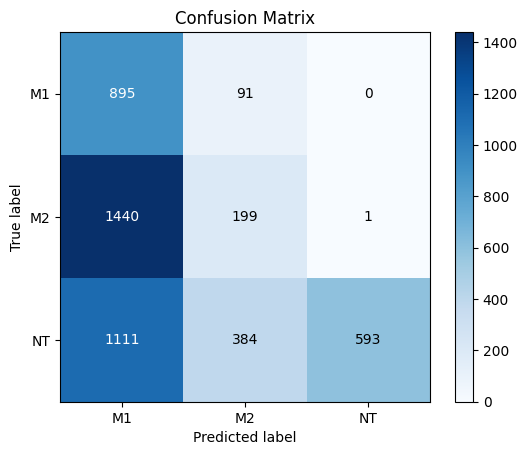

In [4]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Calculate accuracy and f1-macro scores using cross-validation
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, cv=kf, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, cv=kf,scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus, cv=kf,scoring='f1_weighted')

print('--------')
print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))

y_pred = pipe.predict(X_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')
plt.yticks(range(3),['M1', 'M2', 'NT'])
plt.xticks(range(3),['M1', 'M2', 'NT'])

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8726830619178527
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.8789519439877062
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8676962144152695


([<matplotlib.axis.XTick at 0x7fc617e04760>,
 [Text(0, 0, 'M1'), Text(1, 0, 'M2'), Text(2, 0, 'NT')])

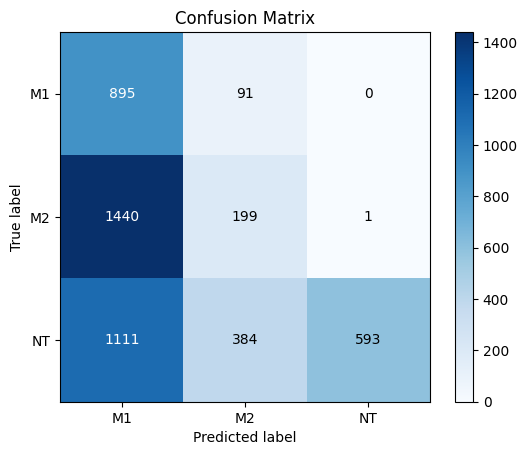

In [5]:
# Calculate accuracy and f1-macro scores using cross-validation
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus,scoring='f1_weighted')

print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))

y_pred = pipe.predict(X_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')
plt.yticks(range(3),['M1', 'M2', 'NT'])
plt.xticks(range(3),['M1', 'M2', 'NT'])

AUC score for M1 0.6062643913936745
AUC score for M2 0.47503788660202795
AUC score for NT 0.7349375023709268
Average AUC 0.6054132601222098


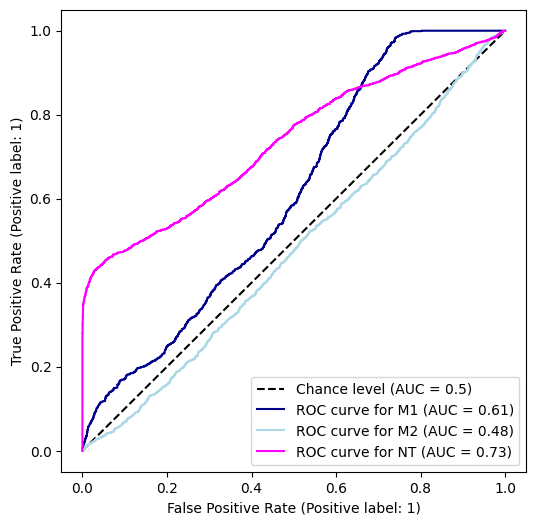

In [6]:
macrophages_analysis.make_multiclass_roc(pipe, test_data_p4g4)